In [1]:
import pylab as plt
import pandas as pd

## USE python library to retrieve the data from the Internet

In [2]:
import urllib
url = 'https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT5.0NonInfilled_gl.txt' 
urllib.request.urlretrieve(url, 'HadCRUT5.0NonInfilled_gl.dat');

## Use Pandas for plotting

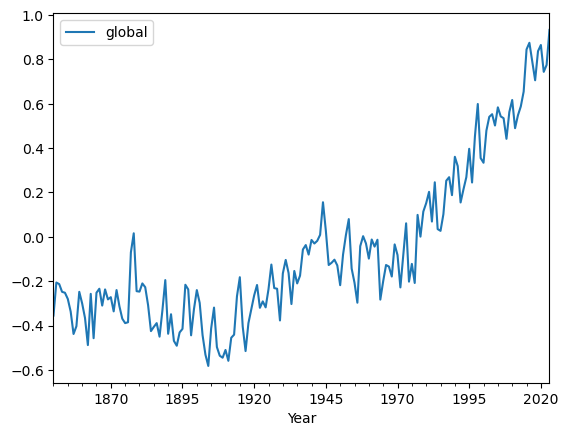

In [3]:
# read in the hadcrut file using Pandas
df1 = pd.read_csv('HadCRUT5.0NonInfilled_gl.dat', header=None, delim_whitespace=True)

# the lack of header information is worth fixing
df1.columns=['Year','anom1','anom2','anom3','anom4','anom5','anom6','anom7','anom8','anom9','anom10','anom11','anom12', 'global']

# now select every other row of the data - every second row is redundant
df2 = df1[df1.index % 2 == 0]  # Excludes every 2nd row starting from 0

# now we need to fix the index of the dataframe - currently this is just 1,2,3,4
# we'd like it to be a datetime object - this should enable you to plot two datasets
# on the same axis set
format = '%Y'
hadcrut_years = pd.to_datetime(df2['Year'], format=format)

# now assign the new dataframe index to this series
df2.index = hadcrut_years

# select last column of dataframe which is the global anomaly
hadcrut = df2.iloc[:,-1:]

# now plot
hadcrut.plot();

## Use Seaborn - look any better?

In [4]:
## fix up the plot a bit
import seaborn as sns

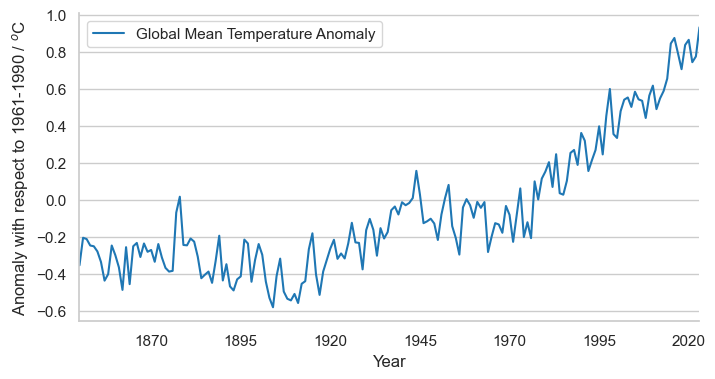

In [10]:
# read in the hadcrut file using Pandas
df1 = pd.read_csv('HadCRUT5.0NonInfilled_gl.dat', header=None, delim_whitespace=True)

# the lack of header information is worth fixing
df1.columns=['Year','anom1','anom2','anom3','anom4','anom5','anom6','anom7','anom8','anom9','anom10','anom11','anom12', 'Global Mean Temperature Anomaly']

# now select every other row of the data - every second row is redundant
df2 = df1[df1.index % 2 == 0]  # Excludes every 2nd row starting from 0

# now we need to fix the index of the dataframe - currently this is just 1,2,3,4
# we'd like it to be a datetime object - this should enable you to plot two datasets
# on the same axis set
format = '%Y'
hadcrut_years = pd.to_datetime(df2['Year'], format=format)

# now assign the new dataframe index to this series
df2.index = hadcrut_years

# select last column of dataframe which is the global anomaly
hadcrut = df2.iloc[:,-1:]

sns.set_theme(style="whitegrid", palette="tab10")

# now plot
fig = plt.figure(figsize=(8,4))
ax=plt.subplot(1,1,1)
hadcrut.plot(ax=ax);
plt.ylabel('Anomaly with respect to 1961-1990 / $^o$C' )
plt.grid(axis='x')
sns.despine()